<a href="https://colab.research.google.com/github/Rithvikns/Machine_Learning/blob/main/Supervised_Learning/Classification/Naive_Bayers/NaiveBayersAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
wine = load_wine()
X = wine.data
y = wine.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [14]:
y_pred = nb.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the naive bayers model is : {accuracy}")
print("\n Classification report " , classification_report(y_test,y_pred))

The accuracy of the naive bayers model is : 0.9722222222222222

 Classification report                precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [16]:
cv_scores = cross_val_score(nb, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.94444444 0.97222222 0.97222222 0.94285714 1.        ]
Mean Cross-Validation Accuracy: 0.9663492063492063


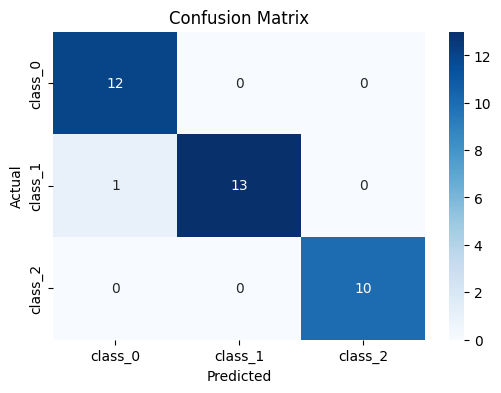

In [17]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()